In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("CP_전처리 작업.xlsx",sheet_name=3,dtype = {'GMFCS_Level': str})
df=df.fillna("")

In [5]:
df.columns

Index(['No', '성별', '등급', 'GMFCS_Level', '생리학적분류', '해부학적분류', '설문1', '휠체어 사용기간',
       '설문1연도', '설문1_1', '설문2', '자세보조용구 사용기간', '설문2연도', '설문2_1', '필요한 보조기기 요약',
       '필요한 보조기기'],
      dtype='object')

In [6]:
df

,No,성별,등급,GMFCS_Level,생리학적분류,해부학적분류,설문1,휠체어 사용기간,설문1연도,설문1_1,설문2,자세보조용구 사용기간,설문2연도,설문2_1,필요한 보조기기 요약,필요한 보조기기
0,2,M,1,3,4,3,1,6,2010.0,3.0,2,2016,,,(생략),(생략)
1,13,M,1,5,4,3,1,11,2005.0,2.0,2,2016,,,(생략),(생략)
2,30,M,1,5,1,3,1,9,2007.0,3.0,1,9,2007.0,3.0,(생략),(생략)
3,34,F,1,3,3,3,1,11,2005.0,3.0,2,2016,,,(생략),(생략)
4,35,M,1,5,4,1,1,5,2011.0,3.0,2,2016,,,(생략),(생략)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,113,F,1,5,3,3,1,4,2012.0,2.0,1,0,2016.0,3.0,다기능 체어,"· 다기능체어 : 기존의 다기능 체어에 각도조절, 탈부착 가능 기능이 있는 맞춤형 ..."
150,118,M,2,4,4,2,1,4,2012.0,3.0,1,4,2012.0,2.0,허벅지 보조기,· 허벅지 조임 현상 치료가 가능한 치료보조기
151,150,F,1,5,1,3,1,28,1988.0,2.0,1,2,2014.0,3.0,컴퓨터 입력 보조기기\nTTS 보조기\n전동휠체어,"잔고장이 없는 마우스 보조기기, 기사나 책을 읽어주는 컴퓨터 프로그램, 발로운전가능..."
152,152,F,1,4,1,3,1,13,2003.0,3.0,2,2016,,,휠체어 보조기기\n팔 보조기기\n다리 보조기기,"혼자 휠체어 탈 수 있는 보조장치, 팔/다리 강직을 최소화 할 수 있는 보조기기"


In [8]:
df1=df[['GMFCS_Level', '생리학적분류', '해부학적분류','필요한 보조기기 요약']]
df1.tail()

,GMFCS_Level,생리학적분류,해부학적분류,필요한 보조기기 요약
149,5,3,3,다기능 체어
150,4,4,2,허벅지 보조기
151,5,1,3,컴퓨터 입력 보조기기\nTTS 보조기\n전동휠체어
152,4,1,3,휠체어 보조기기\n팔 보조기기\n다리 보조기기
153,4,2,3,높낮이 조절 싱크대\n전동휠체어


In [85]:
df2=df1[df1['필요한 보조기기 요약']!="(생략)"].reset_index(drop=True)
df2

,GMFCS_Level,생리학적분류,해부학적분류,필요한 보조기기 요약
0,5,1,3,대소변 용구\n좌식의자
1,3,4,2,각도조절 카시트
2,5,1,3,고개고정기구
3,5,4,3,고관절 탈구 보조기
4,3,3,3,고관절 탈구 보조기\n기립보조기구
...,...,...,...,...
106,5,3,3,다기능 체어
107,4,4,2,허벅지 보조기
108,5,1,3,컴퓨터 입력 보조기기\nTTS 보조기\n전동휠체어
109,4,1,3,휠체어 보조기기\n팔 보조기기\n다리 보조기기


In [42]:
# 환자 일련번호가 붙은 상태로 사용하는 보조기기를 한 칼럼에 중복나열
df3=[]
for j in range(0,len(df2)):
    for i in range(0,len(df2.iloc[j,3].split("\n"))):
            df3.append({"일련번호":j, "GMFCS_Level": df2.iloc[j,0],"생리학적분류":df2.iloc[j,1],"해부학적분류":df2.iloc[j,2],"필요한 보조기기 요약" : df2.iloc[j,3].split("\n")[i]})

In [54]:
df4=pd.DataFrame(df3)
df4.tail() #.to_excel("GMFCS_Level별 사용중인보조기기.xlsx")

,일련번호,GMFCS_Level,생리학적분류,해부학적분류,필요한 보조기기 요약
154,109,4,1,3,휠체어 보조기기
155,109,4,1,3,팔 보조기기
156,109,4,1,3,다리 보조기기
157,110,4,2,3,높낮이 조절 싱크대
158,110,4,2,3,전동휠체어


In [60]:
df5=df4.drop(['일련번호',"생리학적분류","해부학적분류"],axis=1)
df5.head()

,GMFCS_Level,필요한 보조기기 요약
0,5,대소변 용구
1,5,좌식의자
2,3,각도조절 카시트
3,5,고개고정기구
4,5,고관절 탈구 보조기


In [62]:
df6=df5.pivot_table(index='필요한 보조기기 요약', columns='GMFCS_Level', 
                        aggfunc=len, fill_value=0)
df6.head()

GMFCS_Level,2,3,4,5
필요한 보조기기 요약,,,,
TTS 보조기,0,0,0,1
각도조절 카시트,0,1,0,0
고개고정기구,0,0,0,2
고관절 탈구 보조기,0,1,0,1
기립 보조기,0,0,1,0


In [63]:
plt.rc('font', family = 'NanumGothic')

In [74]:
# 범죄 검거 비율 heatmap으로 시각화
target_col = ['2','3','4','5']
df_sort = df6.sort_values(by=['5','4','3','2'], ascending=False)

No handles with labels found to put in legend.


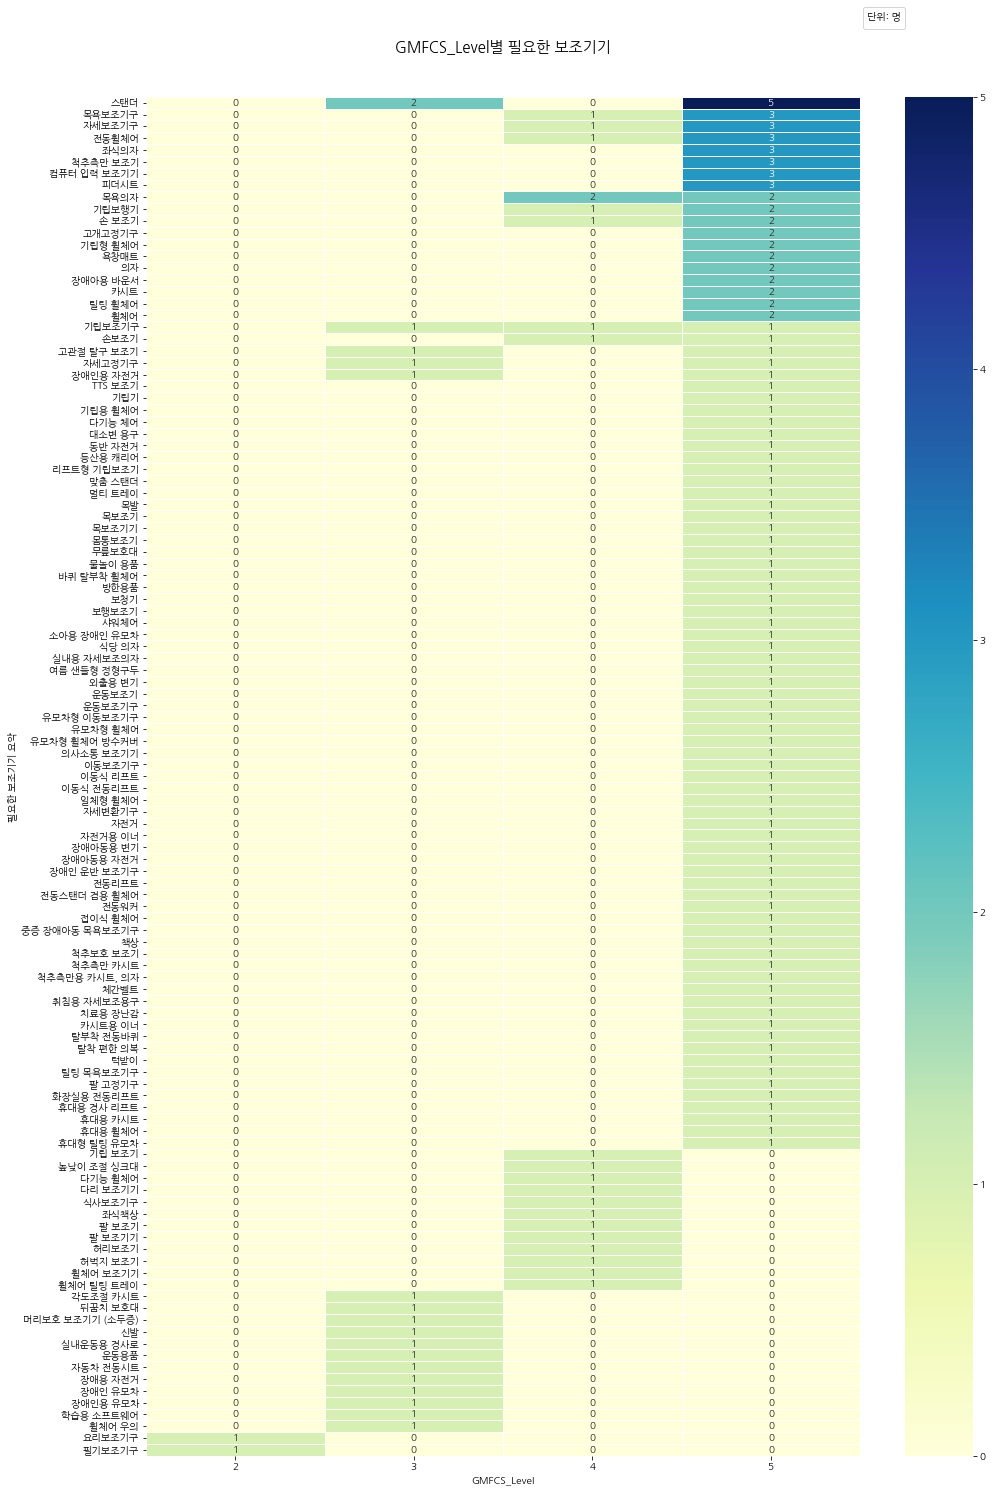

In [117]:
plt.figure(figsize = (16,25))
sns.heatmap(df_sort, annot=True, 
           linewidths=.5, cmap='YlGnBu')
plt.title('GMFCS_Level별 필요한 보조기기',fontsize=15,y=1.03)
plt.legend(title="단위: 명",loc='upper right', bbox_to_anchor=(1.07, 1.07),fontsize=10)
#plt.show() #얘 하고 나면 저장이 안돼
plt.savefig('GMFCS_Level별 필요한 보조기기.png', dpi=600) # 그래프 파일로 출력하기, 이 함수 이전에 plt.show 하면 빈 화면 출력되니 주의

---

In [76]:
df2.head()

,GMFCS_Level,생리학적분류,해부학적분류,필요한 보조기기 요약
0,5,1,3,대소변 용구\n좌식의자
1,3,4,2,각도조절 카시트
2,5,1,3,고개고정기구
3,5,4,3,고관절 탈구 보조기
4,3,3,3,고관절 탈구 보조기\n기립보조기구


In [83]:
df2

'대소변 용구/좌식의자'

In [100]:
df7=df2
for i in range(len(df2)):
    df2.iloc[i,3]=df2.iloc[i,3].replace("\n","/")
df7

,GMFCS_Level,생리학적분류,해부학적분류,필요한 보조기기 요약
0,5,1,3,대소변 용구/좌식의자
1,3,4,2,각도조절 카시트
2,5,1,3,고개고정기구
3,5,4,3,고관절 탈구 보조기
4,3,3,3,고관절 탈구 보조기/기립보조기구
...,...,...,...,...
106,5,3,3,다기능 체어
107,4,4,2,허벅지 보조기
108,5,1,3,컴퓨터 입력 보조기기/TTS 보조기/전동휠체어
109,4,1,3,휠체어 보조기기/팔 보조기기/다리 보조기기


In [104]:
df8=df7.drop(["생리학적분류","해부학적분류"],axis=1)
df8.head()

,GMFCS_Level,필요한 보조기기 요약
0,5,대소변 용구/좌식의자
1,3,각도조절 카시트
2,5,고개고정기구
3,5,고관절 탈구 보조기
4,3,고관절 탈구 보조기/기립보조기구


In [105]:
df9=df8.pivot_table(index='필요한 보조기기 요약', columns='GMFCS_Level', 
                        aggfunc=len, fill_value=0)
df9.head()

GMFCS_Level,2,3,4,5
필요한 보조기기 요약,,,,
각도조절 카시트,0,1,0,0
고개고정기구,0,0,0,1
고관절 탈구 보조기,0,0,0,1
고관절 탈구 보조기/기립보조기구,0,1,0,0
기립 보조기,0,0,1,0


In [106]:
plt.rc('font', family = 'NanumGothic')

In [109]:
# 범죄 검거 비율 heatmap으로 시각화
target_col = ['2','3','4','5']
df10 = df9.sort_values(by=['5','4','3','2'], ascending=False)

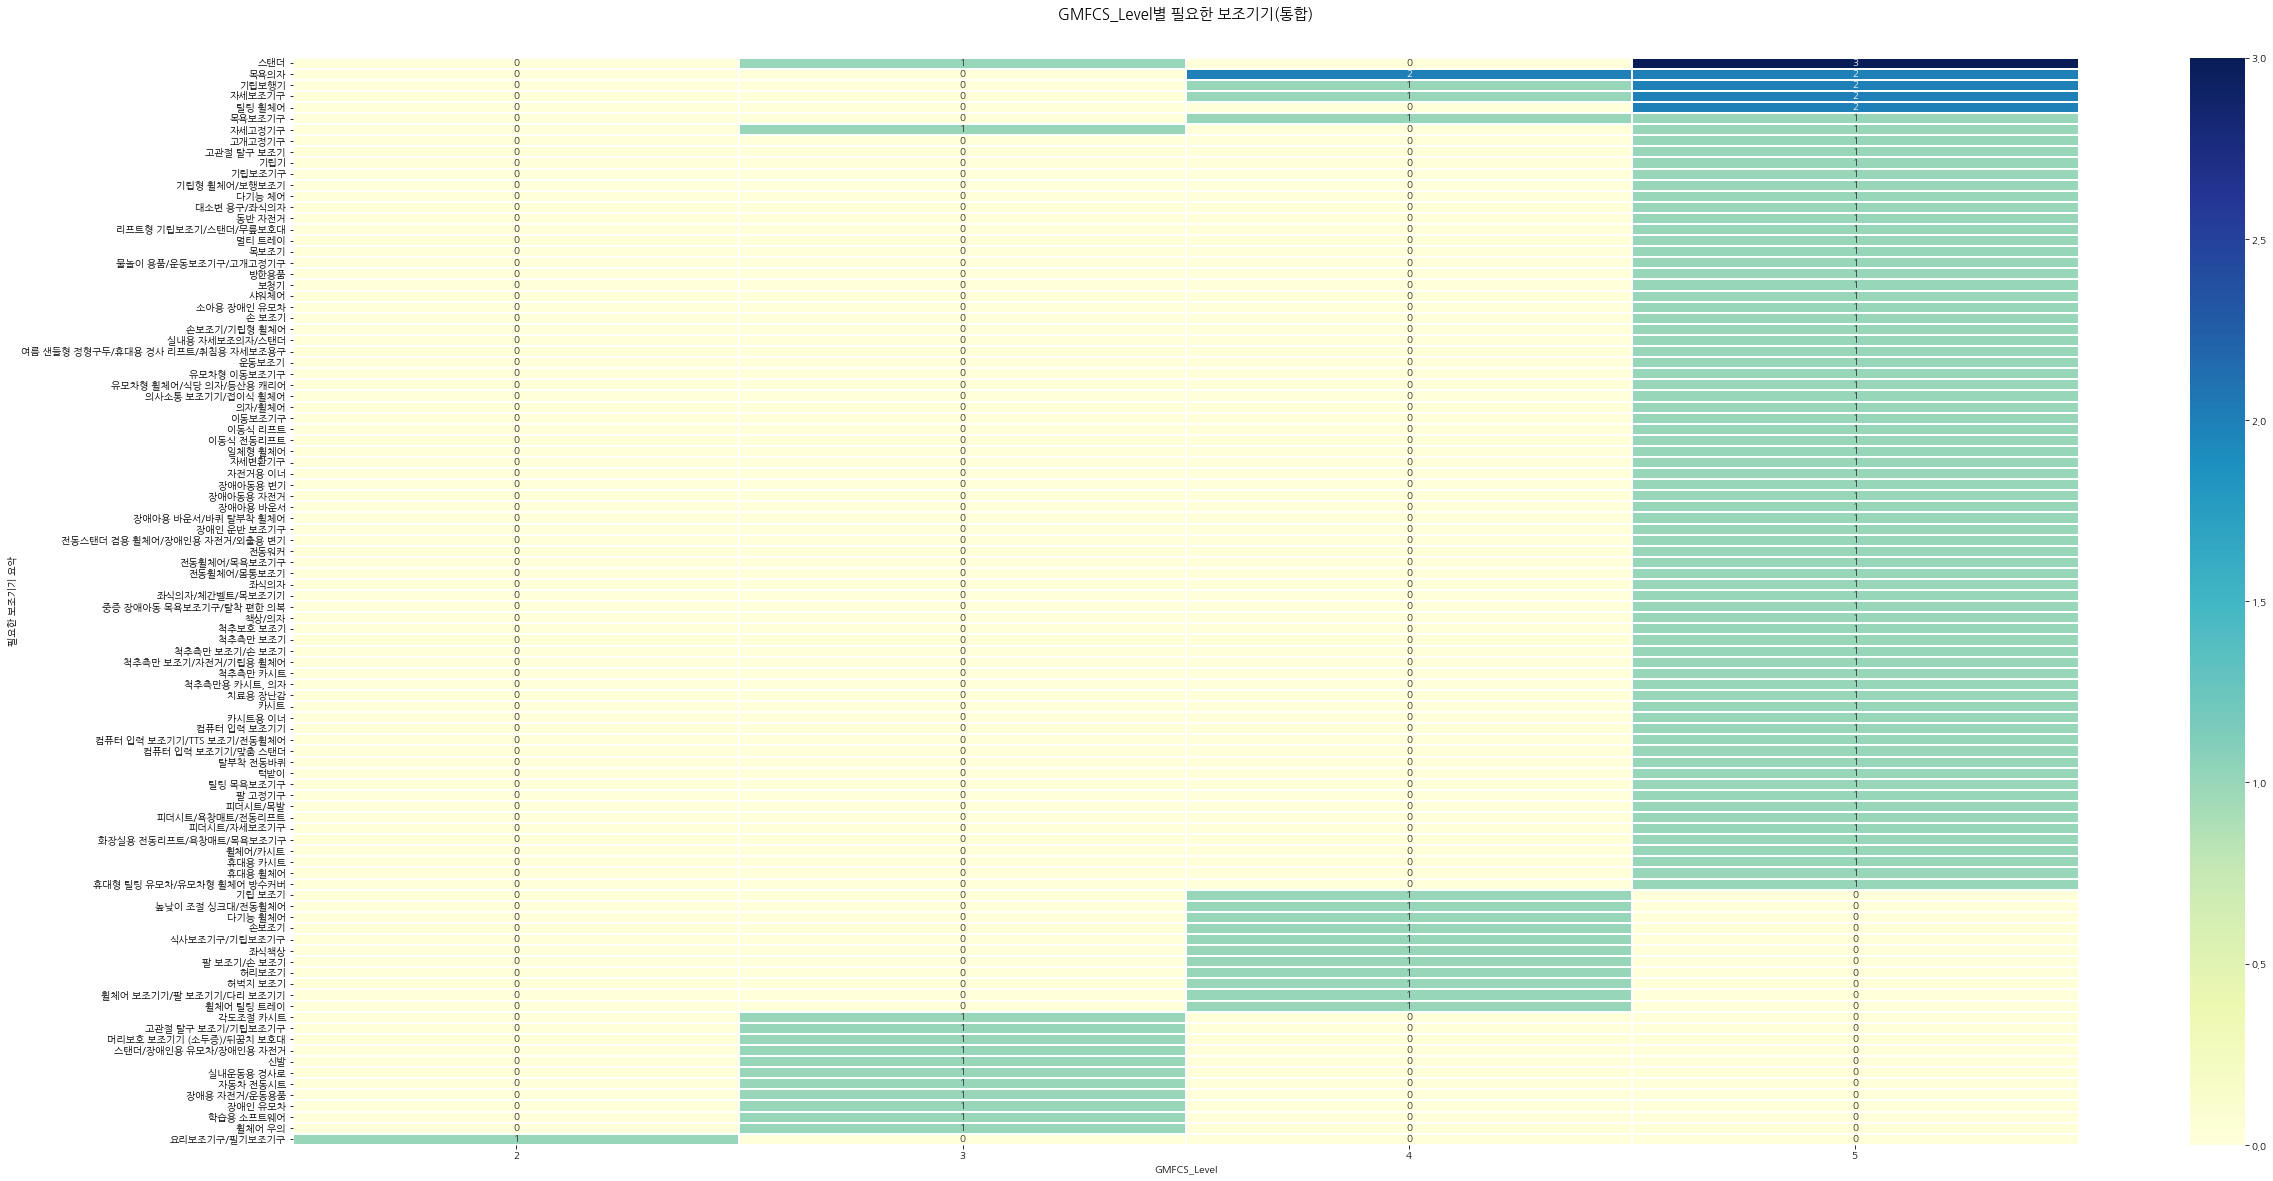

In [111]:
plt.figure(figsize = (40,20))
sns.heatmap(df10, annot=True, 
           linewidths=2, cmap='YlGnBu')
plt.title('GMFCS_Level별 필요한 보조기기(통합)',fontsize=15,y=1.03)
#plt.show() #얘 하면 저장이 하얗게 됨 
plt.savefig('GMFCS_Level별 필요한 보조기기(통합).jpg', dpi=1000) # 그래프 파일로 출력하기, 이 함수 이전에 plt.show 하면 빈 화면 출력되니 주의